### Advanced Machine Learning

# Home Exercise #4

Assignment Due: 17/05/21 23:59

Jonathan Schler

In [ ]:
student1Name="Matan Mizrachi" # student1 name here
student1ID="207299363" # student1 ID here


student2Name="Ron Yosef" # student2 name here
student2ID="318466711" # student2 ID here

The goal of this homework is to try to solve the problem of predicting wine quality from review texts and other properties of the wine. You can find the dataset here:https://www.kaggle.com/zynicide/wine-reviews

While you can find several kernels on kaggle already, I highly recommend you start your ownsolution from scratch. For this homework, only use wine from the United States (only 42% of data). Feel free to subsample the data for building your model.

## Task 1 Bag of Words and simple Features [50pts]

1.1 Create a baseline model for predicting wine quality using only non-text features.





In [ ]:
import pandas as pd
import numpy as np
x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
x = x.loc[x['country'] == 'US']
x.drop(columns=['country'], inplace=True)
x.head(3)

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            54504 non-null  object 
 1   designation            36908 non-null  object 
 2   points                 54504 non-null  int64  
 3   price                  54265 non-null  float64
 4   province               54504 non-null  object 
 5   region_1               54226 non-null  object 
 6   region_2               50511 non-null  object 
 7   taster_name            37730 non-null  object 
 8   taster_twitter_handle  34741 non-null  object 
 9   title                  54504 non-null  object 
 10  variety                54504 non-null  object 
 11  winery                 54504 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.4+ MB


As per the requirements, we drop the text-based column.

In [ ]:
x.drop(columns=['description'], inplace=True)
y = x['points']
x.drop(columns=['points'], inplace=True)

In [ ]:
np.unique(y, return_counts=True)

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100], dtype=int64),
 array([ 157,  326, 1010, 1313, 2676, 3684, 4926, 6632, 7039, 4416, 6708,
        5302, 4515, 3013, 1794,  642,  221,   81,   33,   12,    4],
       dtype=int64))

The data isn't balanced, so we'll see how it works before we use SMOTE to balance it.

In [ ]:
cat = x.dtypes == object
x.loc[:, cat] = x.loc[:, cat].apply(lambda z: z.astype('category').cat.codes)
x.shape

(54504, 10)

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [ ]:
base_model = Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()), ('LR', LR())])
params = {'imputer__n_neighbors': [2, 3, 4], 
          'LR__penalty': ['l2', 'l1'],
         'LR__C': np.logspace(-3, 2, 5),
         'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

base_model = GridSearchCV(base_model, param_grid=params, cv=3, return_train_score=True, verbose=10).fit(x_train, y_train)

In [ ]:
base_model.best_estimator_

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('LR',
                 LogisticRegression(C=5.623413251903491, solver='newton-cg'))])

In [ ]:
base_model = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('LR',
                 LR(C=5.623413251903491, solver='newton-cg'))]).fit(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve, plot_confusion_matrix
print(classification_report(y_test, base_model.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, base_model.predict_proba(x_test), multi_class='ovr')}")

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          80       0.00      0.00      0.00        47
          81       0.00      0.00      0.00        98
          82       1.00      0.00      0.01       303
          83       0.00      0.00      0.00       394
          84       0.23      0.09      0.13       803
          85       0.16      0.01      0.02      1105
          86       0.05      0.00      0.00      1478
          87       0.16      0.45      0.24      1990
          88       0.18      0.39      0.24      2112
          89       0.00      0.00      0.00      1325
          90       0.17      0.27      0.21      2012
          91       0.20      0.14      0.16      1591
          92       0.16      0.15      0.15      1354
          93       0.20      0.05      0.08       904
          94       0.21      0.09      0.13       538
          95       0.00      0.00      0.00       193
          96       0.00      0.00      0.00        66
          97       0.00    

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as smPipline

In [ ]:
x.loc[x['price'].isna(), 'price'] = x['price'].median()

In [ ]:
new_x, new_y = SMOTE(k_neighbors=3).fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3, stratify=new_y)

In [ ]:
base_model = Pipeline(steps=[('scaler', StandardScaler()), ('LR',LR(C=5.623413251903491, solver='newton-cg'))]).fit(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve, plot_confusion_matrix
print(classification_report(y_test, base_model.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, base_model.predict_proba(x_test), multi_class='ovr')}")

              precision    recall  f1-score   support

          80       0.15      0.29      0.19      2112
          81       0.18      0.28      0.22      2112
          82       0.14      0.16      0.15      2112
          83       0.15      0.12      0.14      2112
          84       0.13      0.12      0.13      2111
          85       0.12      0.07      0.09      2112
          86       0.11      0.02      0.03      2112
          87       0.08      0.04      0.06      2112
          88       0.14      0.19      0.16      2112
          89       0.13      0.10      0.11      2112
          90       0.13      0.16      0.15      2112
          91       0.17      0.14      0.15      2111
          92       0.09      0.07      0.08      2112
          93       0.17      0.25      0.20      2111
          94       0.16      0.13      0.14      2111
          95       0.18      0.15      0.16      2112
          96       0.22      0.13      0.16      2112
          97       0.26    

The results are not good at all. We expect to get a model to could do way better than that.

1.2 Create a simple text-based model using a bag-of-words approach and a linear model.


In [ ]:
import pandas as pd
import numpy as np
x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
x = x.loc[x['country'] == 'US']
to_remove = x.columns.to_list()
to_remove.remove('points')
to_remove.remove('description')
x.drop(columns=to_remove, inplace=True)
y = x['points']
x.drop(columns=['points'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train = vect.fit_transform(x_train['description'].to_list())
x_test = vect.transform(x_test['description'].to_list())

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
%%capture
lr = LR().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, lr.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr')}")

              precision    recall  f1-score   support

          80       0.25      0.16      0.20        82
          81       0.15      0.11      0.13       145
          82       0.22      0.22      0.22       347
          83       0.21      0.17      0.18       656
          84       0.26      0.28      0.27      1284
          85       0.24      0.23      0.23      1881
          86       0.24      0.23      0.23      2475
          87       0.28      0.29      0.29      3399
          88       0.25      0.24      0.24      3430
          89       0.22      0.19      0.20      2500
          90       0.26      0.25      0.25      3114
          91       0.21      0.20      0.21      2289
          92       0.21      0.23      0.22      1854
          93       0.19      0.19      0.19      1328
          94       0.17      0.18      0.17       749
          95       0.10      0.15      0.12       280
          96       0.01      0.02      0.02       100
          97       0.05    

1.3 Try using n-grams, characters, tf-idf rescaling and possibly other ways to tune the BoW model. Be aware that you might need to adjust the (regularization of the) linear model for different feature sets.


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression as LR
from imblearn.over_sampling import SMOTE
x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
to_remove = x.columns.to_list()
to_remove.remove('points')
to_remove.remove('description')
x.drop(columns=to_remove, inplace=True)
y = x['points']
x.drop(columns=['points'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
transformer = make_pipeline(CountVectorizer(stop_words='english'), TfidfTransformer()).fit(x_train['description'].to_list())

In [ ]:
x_train = transformer.transform(x_train['description'].to_list())
x_test = transformer.transform(x_test['description'].to_list())

In [ ]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
%%capture
lr = LR().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, lr.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr')}")

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          80       0.13      0.26      0.17        78
          81       0.08      0.25      0.12       124
          82       0.15      0.26      0.19       389
          83       0.13      0.26      0.17       602
          84       0.19      0.22      0.20      1284
          85       0.22      0.24      0.23      1885
          86       0.24      0.19      0.21      2474
          87       0.28      0.22      0.25      3335
          88       0.27      0.20      0.23      3473
          89       0.23      0.22      0.22      2449
          90       0.27      0.20      0.23      3133
          91       0.22      0.21      0.22      2295
          92       0.24      0.22      0.23      2000
          93       0.18      0.22      0.20      1272
          94       0.15      0.29      0.20       735
          95       0.10      0.27      0.14       293
          96       0.02      0.06      0.03       109
          97       0.08    

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
%%capture
lr = LR().fit(normalize(x_train, norm='l2'), y_train)

In [ ]:
print(classification_report(y_test, lr.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr')}")

              precision    recall  f1-score   support

          80       0.13      0.24      0.17        78
          81       0.08      0.21      0.11       124
          82       0.15      0.28      0.20       389
          83       0.13      0.21      0.16       602
          84       0.19      0.24      0.21      1284
          85       0.22      0.21      0.22      1885
          86       0.23      0.21      0.22      2474
          87       0.27      0.23      0.25      3335
          88       0.25      0.20      0.22      3473
          89       0.23      0.23      0.23      2449
          90       0.27      0.20      0.23      3133
          91       0.22      0.24      0.23      2295
          92       0.24      0.22      0.23      2000
          93       0.20      0.23      0.21      1272
          94       0.16      0.26      0.20       735
          95       0.10      0.22      0.14       293
          96       0.05      0.06      0.05       109
          97       0.06    

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### N-Grams

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.metrics import f1_score, average_precision_score, recall_score, classification_report, roc_auc_score
results = np.zeros((4, 4))
count = 0
for i in [(1, 1), (1, 2), (2, 2), (2, 3)]:
    transformer = CountVectorizer(stop_words='english', ngram_range=i).fit(x_train['description'].to_list())
    x_train = transformer.transform(x_train['description'].to_list())
    x_test = transformer.transform(x_test['description'].to_list())
    x_train, y_train = SMOTE().fit_resample(x_train, y_train)
    lr = LR().fit(x_train, y_train)
    results[count, 0] = lr.score(x_test, y_test)
    results[count, 1] = roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr')
    results[count, 2] = f1_score(y_test, lr.predict(x_test), average='macro')
    results[count, 3] = recall_score(y_test, lr.predict(x_test), average='macro')
    count += 1
    print('count = ', count)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
pd.DataFrame(data=results, index=[(1, 1), (1, 2), (2, 2), (2, 3)], columns=['accuracy', 'auc', 'f1', 'recall'])

,accuracy,auc,f1,recall
"(1, 1)",0.236622,0.782689,0.174187,0.174153
"(1, 2)",0.303943,0.792835,0.208129,0.208173
"(2, 2)",0.283285,0.749124,0.186470,0.194465
"(2, 3)",0.276976,0.757223,0.173667,0.198477


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
transformer = CountVectorizer(stop_words='english', ngram_range=(2, 5), analyzer='char_wb').fit(x_train['description'].to_list())
x_train = transformer.transform(x_train['description'].to_list())
x_test = transformer.transform(x_test['description'].to_list())
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
lr = LR().fit(x_train, y_train)

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:502: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, lr.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr')}")

              precision    recall  f1-score   support

          80       0.39      0.08      0.14        83
          81       0.17      0.10      0.12       144
          82       0.19      0.25      0.21       370
          83       0.16      0.13      0.14       598
          84       0.27      0.24      0.25      1352
          85       0.22      0.20      0.21      1928
          86       0.24      0.23      0.23      2497
          87       0.26      0.30      0.28      3401
          88       0.23      0.24      0.24      3479
          89       0.20      0.15      0.17      2442
          90       0.23      0.31      0.27      3023
          91       0.22      0.19      0.20      2244
          92       0.22      0.20      0.21      1907
          93       0.20      0.20      0.20      1280
          94       0.16      0.15      0.15       755
          95       0.10      0.13      0.11       307
          96       0.04      0.04      0.04       112
          97       0.08    

#### Mid Q summary:
Up to this point, we went easy on ourselves by not cross-validating anything, nor giving much care about the pre-processing.
However, we'll take care of it all in the next part.

1.4 Combine the non-text features and the text features. How does adding those features improve upon just using bag-of-words?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline, Pipeline

x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
x = x.loc[x['country'] == 'US']
x = x.reset_index(drop=True)
y = x['points']
x.drop(columns=['points', 'country'], inplace=True)
x.head(3)

,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,"Tart and snappy, the flavors of lime flesh and...",NaN,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
x.isna().sum()

description                  0
designation              17596
price                      239
province                     0
region_1                   278
region_2                  3993
taster_name              16774
taster_twitter_handle    19763
title                        0
variety                      0
winery                       0
dtype: int64

In [ ]:
x.loc[x['designation'].isna(), ['designation', 'variety', 'winery', 'region_1', 'title']]

,designation,variety,winery,region_1,title
0,NaN,Pinot Gris,Rainstorm,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley)
4,NaN,Cabernet Sauvignon,Louis M. Martini,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...
5,NaN,Chardonnay,Mirassou,Central Coast,Mirassou 2012 Chardonnay (Central Coast)
6,NaN,Meritage,Quiévremont,Virginia,Quiévremont 2012 Meritage (Virginia)
8,NaN,Pinot Noir,Acrobat,Oregon,Acrobat 2013 Pinot Noir (Oregon)
...,...,...,...,...,...
54495,NaN,Syrah,Va Piano,Columbia Valley-Walla Walla Valley,Va Piano 2006 Syrah (Columbia Valley-Walla Wal...
54497,NaN,Chardonnay,Apriori,Mendocino County,Apriori 2013 Chardonnay (Mendocino County)
54498,NaN,Cabernet Sauvignon,Arrowood,Sonoma County,Arrowood 2010 Cabernet Sauvignon (Sonoma County)
54502,NaN,Zinfandel,Houdini,Chiles Valley,Houdini 2011 Zinfandel (Chiles Valley)


In [ ]:
x.loc[~x['designation'].isna(), ['designation', 'variety', 'winery', 'region_1', 'title']]

,designation,variety,winery,region_1,title
1,Reserve Late Harvest,Riesling,St. Julian,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...
2,Vintner's Reserve Wild Child Block,Pinot Noir,Sweet Cheeks,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
3,Mountain Cuvée,Cabernet Sauvignon,Kirkland Signature,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...
7,Vin de Maison,Red Blend,Quiévremont,Virginia,Quiévremont 2012 Vin de Maison Red (Virginia)
9,Signature Selection,Merlot,Bianchi,Paso Robles,Bianchi 2011 Signature Selection Merlot (Paso ...
...,...,...,...,...,...
54493,Ash Hollow Vineyard,Syrah,Reininger,Walla Walla Valley (WA),Reininger 2005 Ash Hollow Vineyard Syrah (Wall...
54496,Watson Vineyard,Chardonnay,Standish,Mendocino,Standish 2006 Watson Vineyard Chardonnay (Mend...
54499,Jurassic Park Vineyard Old Vines,Chenin Blanc,Birichino,Santa Ynez Valley,Birichino 2013 Jurassic Park Vineyard Old Vine...
54500,Barrel Fermented,Chardonnay,Flora Springs,Napa Valley,Flora Springs 2013 Barrel Fermented Chardonnay...


#### From looking at the _designation_, _title_, _winery_ and _variety_ columns, it seems like there are some missing values that we could impute by ourselves to the _designation_. Why is that true? because the _title_ column, when _designation_ is filled, designed like the following:

Let $t_i$ be the value of _title_ in row $i$, so: $\\$
$t_i$ = $x_i$ ... $y$ ... $w_i$ ... $z_i$ ... ($v_i$) where: 

- $x_i = $ the value of _winery_ in row $i$
- $y \in \mathbb{N}$ a year
- $w_i = $ the value of _designation_ in row $i$
- $z_i = $ the value of _variety_ in row $i$
- $v_i = $ the value of _province_ in row $i$

#### However, when _designation_ is not filled, the _title_ column designed like the following:

Let $t_i$ be the value of _title_ in row $i$, so: $\\$
$t_i$ = $x_i$ ... $y$ ... $w_i$ ... ($z_i$) where: 

- $x_i = $ the value of _winery_ in row $i$
- $y \in \mathbb{N}$ a year
- $w_i = $ the value of _variety_ in row $i$
- $z_i = $ the value of _province_ in row $i$

#### Which means that the right way of imputation to the column is by setting the missing values to "Unknown".

In [ ]:
x['designation'] = x['designation'].fillna(value='unknown') 

In [ ]:
x.isna().sum()

description                  0
designation                  0
price                      239
province                     0
region_1                   278
region_2                  3993
taster_name              16774
taster_twitter_handle    19763
title                        0
variety                      0
winery                       0
dtype: int64

In [ ]:
x.loc[x['region_1'].isna(), ['province', 'region_1', 'region_2','title']]

,province,region_1,region_2,title
254,Idaho,NaN,NaN,Coiled 2009 Sidewinder Red
255,Idaho,NaN,NaN,Coiled 2010 Black Mamba Red
638,America,NaN,NaN,Gruet NV Blanc de Blancs Chardonnay (America)
692,Idaho,NaN,NaN,Koenig Vineyards 2011 Ice Wine Riesling
930,America,NaN,NaN,Biltmore Estate NV Blanc de Noir Brut Sparklin...
...,...,...,...,...
53893,Idaho,NaN,NaN,Cinder 2014 Syrah
53920,America,NaN,NaN,BBQ Wine Company NV Oink! Red (America)
53921,America,NaN,NaN,BBQ Wine Company NV Oink! White (America)
54283,America,NaN,NaN,Sokol Blosser NV Evolution Brut Sparkling (Ame...


In [ ]:
np.unique(x.loc[x['region_1'].isna()]['title'].apply(lambda x: x.split('(')[-1][:-1] if len(x.split('(')) > 1 else "No Clue"),
          return_counts = True)

(array(['America', 'No Clue', 'Washington-Oregon'], dtype=object),
 array([ 95, 176,   7], dtype=int64))

#### In the case of the rest of the columns contains of missing values, we'll probably have to use an ML algorithm to fill them up, since there's no way for us to do that manually and sufficiently.

In [ ]:
def get_year(row):
    _t = row['title']
    _x = row['winery']
    _w = row['designation']
    _z = row['variety']
    _v = row['region_1']
    
    _words = _t.split(_x)[1][1:].split(' ')
    if _words[0].isnumeric():
        return int(_words[0])
        
    elif _words[0] == 'NV':    
        if _w == 'unknown':
            return np.nan
        else:
            #print(_w.split(' '))
            return np.nan
x['year'] = x.apply(lambda z: get_year(z), axis=1)

In [ ]:
description = x['description'].copy()
x = x.drop(columns=['description'])
x.head(3)

,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,unknown,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
1,Reserve Late Harvest,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
2,Vintner's Reserve Wild Child Block,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


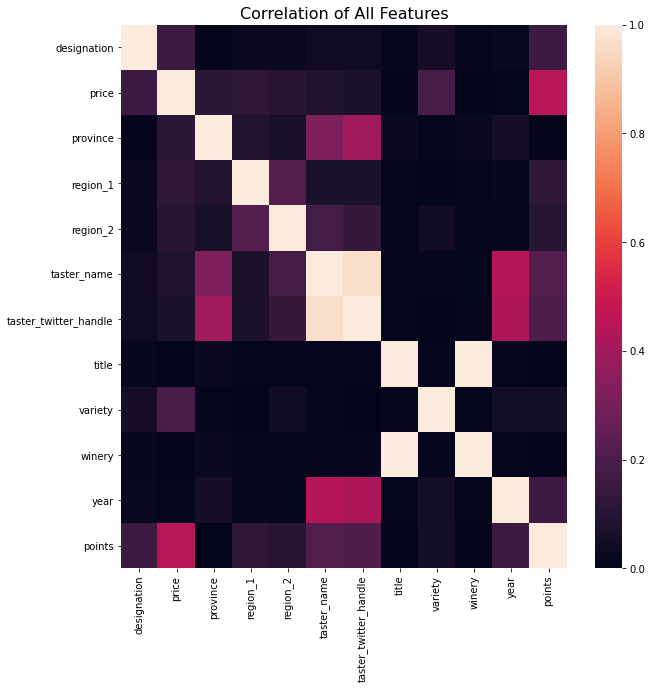

In [ ]:
temp_df = x.apply(lambda z: z.astype('category').cat.codes if z.dtype == object else z)
temp_df['points'] = y.copy()
plt.figure(figsize=(10, 10))
plt.title('Correlation of All Features',y=1,size=16)
sns.heatmap(temp_df.corr().abs(), vmax=1, vmin=0, ax=plt.gca())
plt.show()
temp_df = None

#### We can tell there are features that highly correlated with our target:
- _year_
- _price_
#### In addition, since any possible information has been extracted from _title_, we feel like this feature is a bit redundant, as well as the _taster_twitter_handle_ feature.

In [ ]:
x = x.drop(columns=['title', 'taster_twitter_handle'])
x.head(3)

,designation,price,province,region_1,region_2,taster_name,variety,winery,year
0,unknown,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,2013.0
1,Reserve Late Harvest,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,Riesling,St. Julian,2013.0
2,Vintner's Reserve Wild Child Block,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [ ]:
for c in x:
    print(f'in {c} there are {len(x[c].unique())} unique values')

in designation there are 14184 unique values
in price there are 161 unique values
in province there are 27 unique values
in region_1 there are 265 unique values
in region_2 there are 18 unique values
in taster_name there are 16 unique values
in variety there are 257 unique values
in winery there are 5375 unique values
in year there are 32 unique values


In [ ]:
#to_one_hot = ['']

In [ ]:
tdf = make_pipeline(KNNImputer(n_neighbors=3)).fit_transform(x.apply(lambda z: z.astype('category').cat.codes if z.dtype == object else z).copy())
x = pd.DataFrame(tdf, columns=x.columns)
tdf = None
x.head(3)

,designation,price,province,region_1,region_2,taster_name,variety,winery,year
0,14162.0,14.0,19.0,256.0,16.0,10.0,154.0,3819.0,2013.0
1,9990.0,13.0,11.0,88.0,-1.0,0.0,171.0,4475.0,2013.0
2,13436.0,65.0,19.0,256.0,16.0,10.0,158.0,4606.0,2012.0


In [ ]:
vect = make_pipeline(CountVectorizer(stop_words='english'), TfidfTransformer())
description = vect.fit_transform(description)

In [ ]:
cols = x.columns
description = description.todense()
description = pd.DataFrame(description)
description[cols] = x.copy()
description.head(3)

,0,1,2,3,4,5,6,7,8,9,...,19286,designation,price,province,region_1,region_2,taster_name,variety,winery,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14162.0,14.0,19.0,256.0,16.0,10.0,154.0,3819.0,2013.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9990.0,13.0,11.0,88.0,-1.0,0.0,171.0,4475.0,2013.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13436.0,65.0,19.0,256.0,16.0,10.0,158.0,4606.0,2012.0


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
scores = SelectKBest(mutual_info_classif, k='all')
scores.fit(x, y)
scores = pd.DataFrame(data=scores.scores_, columns=['$MI$'])
scores['column'] = cols
scores

,$MI$,column
0,0.125968,designation
1,0.201089,price
2,0.039007,province
3,0.134566,region_1
4,0.067164,region_2
5,0.090367,taster_name
6,0.055739,variety
7,0.270988,winery
8,0.045489,year


Now, let's summarize what we've done so far:

In [ ]:
%%time
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score, classification_report
from time import time
from sklearn.compose import make_column_transformer

x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
x = x.loc[x['country'] == 'US']
x = x.reset_index(drop=True)
y = x['points']
x.drop(columns=['points', 'country'], inplace=True)
x['designation'] = x['designation'].fillna(value='unknown')
def get_year(row):
    _t = row['title']
    _x = row['winery']
    _w = row['designation']
    _z = row['variety']
    _v = row['region_1']
    
    _words = _t.split(_x)[1][1:].split(' ')
    if _words[0].isnumeric():
        return int(_words[0])
        
    elif _words[0] == 'NV':    
        if _w == 'unknown':
            return np.nan
        else:
            return np.nan
x['year'] = x.apply(lambda z: get_year(z), axis=1)
description = x['description'].copy()
x = x.drop(columns=['description', 'title', 'taster_twitter_handle'])
tdf = make_pipeline(KNNImputer(n_neighbors=3)).fit_transform(x.apply(lambda z: z.astype('category').cat.codes if z.dtype == object else z).copy())
x = pd.DataFrame(tdf, columns=x.columns)
tdf = None
x['description'] = description
cols = x.columns
description = None

Wall time: 12.4 s


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.text_transformer = make_pipeline(CountVectorizer(stop_words='english'), TfidfTransformer())
       
    def fit(self, X, y=None):
        return self.text_transformer.fit(X, y)

    def transform(self, X, y=None):
        return self.text_transformer.transform(X.squeeze()).toarray()
    
    def fit_transform(self, X, y=None):
        return self.text_transformer.fit_transform(X.squeeze()).toarray()

transformer = make_column_transformer((TextProcessor(), ['description']), (StandardScaler(), cols.drop('description')))

In [ ]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

Wall time: 41.9 ms


In [ ]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3)

In [ ]:
%%capture
params = np.logspace(-2, 1, 5)[:-1]
results = np.zeros((2, 4), dtype=object)
for i, _c in enumerate(params):
    auc = np.zeros(3)
    for j, (x1, x2) in enumerate(sss.split(x_train, y_train)):
        t = time()
        _x_1 = x_train.iloc[x1]
        _x_2 = x_train.iloc[x2]
    
        _y_1 = y_train[x1]
        _y_2 = y_train[x2]
        model = Pipeline(steps=[('transformer', transformer), 
                                ('LR',LR(C=_c, n_jobs=3))]).fit(_x_1, _y_1)
        
        auc[j] = roc_auc_score(_y_2, model.predict_proba(_x_2), multi_class='ovr')
    
    results[0, i] = auc.mean()
    results[1, i] = auc.std()
        

In [ ]:
results[0, :]

array([0.736916762920603, 0.8030915582411521, 0.8237142246003075,
       0.8035756236306102, 0], dtype=object)

In [ ]:
results[1, :]

array([0.015181781654675331, 0.0034186740792336513, 0.009229909058309737,
       0.013098519932513564, 0], dtype=object)

In [ ]:
_x_2 = _x_1 = _y_1 = _y_2 = None

In [ ]:
model = Pipeline(steps=[('transformer', transformer), 
                                ('LR',LR(C=params[2], n_jobs=3, verbose=10))], verbose=10).fit(x_train, y_train)

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   5.5s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed: 12.8min
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed: 12.8min finished


[Pipeline] ................ (step 2 of 2) Processing LR, total=12.8min


In [ ]:
print(classification_report(y_test, model.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')}")

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          80       0.00      0.00      0.00        47
          81       0.00      0.00      0.00        98
          82       0.45      0.17      0.25       303
          83       0.28      0.01      0.02       394
          84       0.29      0.22      0.25       803
          85       0.23      0.13      0.17      1105
          86       0.25      0.21      0.23      1478
          87       0.25      0.41      0.31      1990
          88       0.25      0.39      0.30      2112
          89       0.23      0.06      0.10      1325
          90       0.25      0.38      0.30      2012
          91       0.25      0.23      0.24      1591
          92       0.23      0.25      0.24      1354
          93       0.23      0.13      0.16       904
          94       0.20      0.07      0.11       538
          95       0.10      0.01      0.01       193
          96       0.00      0.00      0.00        66
          97       0.00    

So, at this point it seems like we built the best model we've had so far. We cannot try to improve it using SMOTE, as it demands way too much RAM from our machines, so we'll have to accept the results above, although, theoretically, we have a basis to the assumption that balancing our imbalanced data **will** improve our results.

## Task 2 Word Vectors [50pts]

Use a pretrained word-embedding (word2vec, glove or fasttext) for featurization instead of the bag-of-words model. Does this improve classification? How about combining the embedded words with the BoW model?

In [ ]:
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_lg
# !pip install "gensim==4.0.1"

In [ ]:
%%time
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.utils import simple_preprocess
from sklearn.metrics import roc_auc_score, classification_report
from time import time
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3)
x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
x = x.loc[x['country'] == 'US']
x = x.reset_index(drop=True)
y = x['points']
x.drop(columns=['points', 'country'], inplace=True)
x['designation'] = x['designation'].fillna(value='unknown')
def get_year(row):
    _t = row['title']
    _x = row['winery']
    _w = row['designation']
    _z = row['variety']
    _v = row['region_1']
    
    _words = _t.split(_x)[1][1:].split(' ')
    if _words[0].isnumeric():
        return int(_words[0])
        
    elif _words[0] == 'NV':    
        if _w == 'unknown':
            return np.nan
        else:
            return np.nan
x['year'] = x.apply(lambda z: get_year(z), axis=1)
description = x['description'].copy()
x = x.drop(columns=['description', 'title', 'taster_twitter_handle'])
tdf = make_pipeline(KNNImputer(n_neighbors=3)).fit_transform(x.apply(lambda z: z.astype('category').cat.codes if z.dtype == object else z).copy())
x = pd.DataFrame(tdf, columns=x.columns)
tdf = None
x['description'] = description
cols = x.columns
description = None

C:\Users\Matan\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Wall time: 8.02 s


In [ ]:
x.info()
x.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54504 entries, 0 to 54503
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   designation  54504 non-null  float64
 1   price        54504 non-null  float64
 2   province     54504 non-null  float64
 3   region_1     54504 non-null  float64
 4   region_2     54504 non-null  float64
 5   taster_name  54504 non-null  float64
 6   variety      54504 non-null  float64
 7   winery       54504 non-null  float64
 8   year         54504 non-null  float64
 9   description  54504 non-null  object 
dtypes: float64(9), object(1)
memory usage: 4.2+ MB


,designation,price,province,region_1,region_2,taster_name,variety,winery,year,description
0,14162.0,14.0,19.0,256.0,16.0,10.0,154.0,3819.0,2013.0,"Tart and snappy, the flavors of lime flesh and..."
1,9990.0,13.0,11.0,88.0,-1.0,0.0,171.0,4475.0,2013.0,"Pineapple rind, lemon pith and orange blossom ..."
2,13436.0,65.0,19.0,256.0,16.0,10.0,158.0,4606.0,2012.0,"Much like the regular bottling from 2012, this..."


In [ ]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Wall time: 33.9 ms


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class D2V(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=5, window=5, min_count=1, epochs=10):
        self.model = Doc2Vec(vector_size=vector_size, window=window, min_count=min_count, workers=3)
        self.epochs = epochs
        self.min_count = min_count
        self.window = window
        self.vector_size = vector_size
       
    def fit(self, X, y=None):
        _X = [TaggedDocument(simple_preprocess(doc), [i]) for i, doc in enumerate(X.iloc[:, 0])]
        self.vocab = _X.copy()
        self.model.build_vocab(_X)
        self.model.train(_X, total_examples=self.model.corpus_count, epochs=self.epochs)
        return self

    def transform(self, X, y=None):
        _X = [TaggedDocument(simple_preprocess(doc), [i]) for i, doc in enumerate(X.iloc[:, 0])]
        vectors = [self.model.infer_vector(_X[doc_id].words) for doc_id in range(len(_X))]
        return np.vstack(vectors)
    
    def fit_transform(self, X, y=None):
        _X = [TaggedDocument(simple_preprocess(doc), [i]) for i, doc in enumerate(X.iloc[:, 0])]
        self.vocab = _X.copy()
        self.model.build_vocab(_X)
        self.model.train(_X, total_examples=self.model.corpus_count, epochs=self.epochs)
        vectors = [self.model.infer_vector(_X[doc_id].words) for doc_id in range(len(_X))]
        return np.vstack(vectors)

#### Doc2Vec:

In [ ]:
from sklearn.model_selection import ParameterGrid
c = np.logspace(-2, 1, 5)[2]
params = {'mc': np.arange(2, 5), 'window': [3, 5], 'vs': [50, 70, 100]}
params = list(ParameterGrid(params))


In [ ]:
results = np.zeros((len(params), 4))
for i, _p in enumerate(params):
    auc = np.zeros(3)
    score = np.zeros(3)
    print(f'starting hyperparameters set {i+1}/{len(params)}')
    for j, (x1, x2) in enumerate(sss.split(x_train, y_train)):
        t = time()
        _x_1 = x_train.iloc[x1]
        _x_2 = x_train.iloc[x2]
    
        _y_1 = y_train[x1]
        _y_2 = y_train[x2]
        print(f'starting cv {j+1}/3')
        transformer = make_column_transformer((D2V(vector_size=_p['vs'], window=_p['window'], min_count=_p['mc'], epochs=25), 
                                               ['description']), (StandardScaler(), cols.drop('description')))
        model = Pipeline(steps=[('transformer', transformer), 
                                ('LR',LR(C=c, n_jobs=3, solver='newton-cg'))], verbose=10).fit(_x_1, _y_1)
        
        auc[j] = roc_auc_score(_y_2, model.predict_proba(_x_2), multi_class='ovr')
        score[j] = model.score(_x_2, _y_2)
        print(f'ending cv {j+1}/3')
    
    print(f'ending hyperparameters set {i+1}/{len(params)}; auc = {auc.mean()}')
    results[i, 0] = auc.mean()
    results[i, 1] = auc.std()
    results[i, 2] = score.mean()
    results[i, 3] = score.std()

In [ ]:
results[:, 0].argmax()

14

In [ ]:
results[:, 2].argmax()

14

In [ ]:
params[14]

{'mc': 4, 'vs': 70, 'window': 3}

In [ ]:
p_vals = np.array([list(p.values()) for p in params])

In [ ]:
print(f'windows = 3 ; E[auc] = {results[p_vals[:, 2] == 3][:, 0].mean()} \nwindows = 5 ; E[auc] = {results[p_vals[:, 2] == 5][:, 0].mean()}')

windows = 3 ; E[auc] = 0.8081735438011461 
windows = 5 ; E[auc] = 0.8031302702536478


In [ ]:
print(f'vector_size = 50 ; E[auc] = {results[p_vals[:, 1] == 50][:, 0].mean()} \nvector_size = 70 ; E[auc] = {results[p_vals[:, 1] == 70][:, 0].mean()} \nmin_count = 4 ; E[auc] = {results[p_vals[:, 1] == 100][:, 0].mean()}')

vector_size = 50 ; E[auc] = 0.8038461864333305 
vector_size = 70 ; E[auc] = 0.8115905004181295 
min_count = 4 ; E[auc] = 0.8015190342307309


In [ ]:
print(f'min_count = 2 ; E[auc] = {results[p_vals[:, 0] == 2][:, 0].mean()} \nmin_count = 3 ; E[auc] = {results[p_vals[:, 0] == 3][:, 0].mean()} \nmin_count = 4 ; E[auc] = {results[p_vals[:, 0] == 4][:, 0].mean()}')

min_count = 2 ; E[auc] = 0.8053099285733976 
min_count = 3 ; E[auc] = 0.8068671072698352 
min_count = 4 ; E[auc] = 0.8047786852389579


In [ ]:
_x_1 = _x_2 = _y_1 = _y_2 = None

In [ ]:
transformer = make_column_transformer((D2V(vector_size=70, window=3, min_count=4, epochs=25), 
                                               ['description']), (StandardScaler(), cols.drop('description')))
model = Pipeline(steps=[('transformer', transformer), 
                                ('LR',LR(C=c, n_jobs=3, solver='newton-cg'))], verbose=10).fit(x_train, y_train)

[Pipeline] ....... (step 1 of 2) Processing transformer, total= 3.3min
[Pipeline] ................ (step 2 of 2) Processing LR, total=  57.0s


In [ ]:
print(classification_report(y_test, model.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')}")

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          80       0.00      0.00      0.00        47
          81       0.06      0.01      0.02        98
          82       0.17      0.14      0.15       303
          83       0.14      0.03      0.05       394
          84       0.22      0.23      0.22       803
          85       0.19      0.14      0.16      1105
          86       0.19      0.16      0.18      1478
          87       0.22      0.33      0.27      1990
          88       0.22      0.30      0.26      2112
          89       0.11      0.02      0.03      1325
          90       0.23      0.35      0.28      2012
          91       0.24      0.21      0.23      1591
          92       0.21      0.23      0.22      1354
          93       0.25      0.18      0.21       904
          94       0.26      0.20      0.22       538
          95       0.20      0.04      0.06       193
          96       0.19      0.05      0.07        66
          97       0.00    

So far the results havent been improved. However, we could still try to improve these using data balancing techniques:

In [ ]:
from imblearn.over_sampling import SMOTE
c = np.logspace(-2, 1, 5)[2]
transformer = make_column_transformer((D2V(vector_size=70, window=3, min_count=4, epochs=25), ['description']), 
                                      (StandardScaler(), cols.drop('description')))

transformer.fit(x_train)
new_x = transformer.transform(x)
new_x, new_y = SMOTE(k_neighbors=3).fit_resample(new_x, y)
lr = LR(C=c, n_jobs=3, solver='newton-cg')

In [ ]:
%%time
del x_test
del x_train
del y_test
del y_train
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3)

Wall time: 92.6 ms


In [ ]:
model = lr.fit(x_train, y_train)

In [ ]:
print(classification_report(y_test, model.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')}")

              precision    recall  f1-score   support

          80       0.42      0.64      0.51      2093
          81       0.35      0.43      0.38      2112
          82       0.30      0.30      0.30      2125
          83       0.22      0.16      0.18      2117
          84       0.23      0.26      0.24      2074
          85       0.19      0.13      0.15      2084
          86       0.20      0.17      0.18      2118
          87       0.17      0.14      0.16      2151
          88       0.15      0.11      0.13      2178
          89       0.21      0.27      0.24      2118
          90       0.18      0.18      0.18      2033
          91       0.22      0.19      0.20      2155
          92       0.21      0.17      0.19      2097
          93       0.23      0.24      0.23      2079
          94       0.27      0.21      0.24      2125
          95       0.35      0.32      0.33      2130
          96       0.48      0.54      0.51      2077
          97       0.70    

These are the best results we've had so far, with balancing the imbalanced data and using the doc2vec model to encode our text feature.

#### BoW + Doc2Vec:

In [ ]:
%%time
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.utils import simple_preprocess
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.compose import make_column_transformer

x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
x = x.loc[x['country'] == 'US']
x = x.reset_index(drop=True)
y = x['points']
x.drop(columns=['points', 'country'], inplace=True)
x['designation'] = x['designation'].fillna(value='unknown')
def get_year(row):
    _t = row['title']
    _x = row['winery']
    _w = row['designation']
    _z = row['variety']
    _v = row['region_1']
    
    _words = _t.split(_x)[1][1:].split(' ')
    if _words[0].isnumeric():
        return int(_words[0])
        
    elif _words[0] == 'NV':    
        if _w == 'unknown':
            return np.nan
        else:
            return np.nan
x['year'] = x.apply(lambda z: get_year(z), axis=1)
description = x['description'].copy()
x = x.drop(columns=['description', 'title', 'taster_twitter_handle'])
tdf = make_pipeline(KNNImputer(n_neighbors=3)).fit_transform(x.apply(lambda z: z.astype('category').cat.codes if z.dtype == object else z).copy())
x = pd.DataFrame(tdf, columns=x.columns)
tdf = None
x['description'] = description
cols = x.columns
description = None
c = np.logspace(-2, 1, 5)[2]

C:\Users\Matan\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Wall time: 8.29 s


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.text_transformer = make_pipeline(CountVectorizer(stop_words='english'), TfidfTransformer())
       
    def fit(self, X, y=None):
        self.text_transformer.fit(X, y)
        return self

    def transform(self, X, y=None):
        return self.text_transformer.transform(X.squeeze()).toarray()
    
    def fit_transform(self, X, y=None):
        return self.text_transformer.fit_transform(X.squeeze()).toarray()
    
class D2V(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=5, window=5, min_count=1, epochs=10):
        self.model = Doc2Vec(vector_size=vector_size, window=window, min_count=min_count, workers=3)
        self.epochs = epochs
        self.min_count = min_count
        self.window = window
        self.vector_size = vector_size
       
    def fit(self, X, y=None):
        _X = [TaggedDocument(simple_preprocess(doc), [i]) for i, doc in enumerate(X.iloc[:, 0])]
        self.vocab = _X.copy()
        self.model.build_vocab(_X)
        self.model.train(_X, total_examples=self.model.corpus_count, epochs=self.epochs)
        return self

    def transform(self, X, y=None):
        _X = [TaggedDocument(simple_preprocess(doc), [i]) for i, doc in enumerate(X.iloc[:, 0])]
        vectors = [self.model.infer_vector(_X[doc_id].words) for doc_id in range(len(_X))]
        return np.vstack(vectors)
    
    def fit_transform(self, X, y=None):
        _X = [TaggedDocument(simple_preprocess(doc), [i]) for i, doc in enumerate(X.iloc[:, 0])]
        self.vocab = _X.copy()
        self.model.build_vocab(_X)
        self.model.train(_X, total_examples=self.model.corpus_count, epochs=self.epochs)
        vectors = [self.model.infer_vector(_X[doc_id].words) for doc_id in range(len(_X))]
        return np.vstack(vectors)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [ ]:
d2v = D2V(vector_size=70, window=3, min_count=4, epochs=25)
transformer = make_column_transformer((TextProcessor(), ['description']), (d2v, ['description']), (StandardScaler(), cols.drop('description')))

In [ ]:
%%time
model = make_pipeline(transformer, LR(C=c, n_jobs=3, solver='newton-cg')).fit(x_train, y_train)

Wall time: 39min 28s


In [ ]:
print(classification_report(y_test, model.predict(x_test)))
print(f"AUC = {roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')}")

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          80       0.00      0.00      0.00        47
          81       0.11      0.01      0.02        98
          82       0.30      0.27      0.29       303
          83       0.14      0.05      0.07       394
          84       0.26      0.24      0.25       803
          85       0.21      0.18      0.19      1105
          86       0.23      0.22      0.22      1478
          87       0.26      0.37      0.30      1990
          88       0.25      0.33      0.28      2112
          89       0.22      0.09      0.12      1325
          90       0.26      0.35      0.30      2012
          91       0.26      0.23      0.25      1591
          92       0.24      0.27      0.25      1354
          93       0.27      0.20      0.23       904
          94       0.29      0.21      0.24       538
          95       0.15      0.04      0.06       193
          96       0.08      0.02      0.03        66
          97       0.12    

The results doesnt seem to improve in any way. However, we cannot test the model on balanced data, again, since our RAM capacity doesn't allow it, so we shall keep in mind that this might actually improve our model significantly.

# Task 3 Transformers (bonus / optional) [50pts] - Like Extra Assignment with 50% weight

Fine-tune a BERT model on the text data alone using the transformers library. How does this model compare to a BoW model, and how does it compare to a model using all features?

In [ ]:
# !pip install transformers

In [ ]:
%%time
from transformers import pipeline
import transformers
import pandas as pd
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.compose import make_column_transformer
from transformers import BertTokenizerFast
import numpy as np
import numba as nb

x = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
x = x.loc[x['country'] == 'US']
y = x['points']
x = x[['description']]

Wall time: 9.49 s


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
@nb.jit(parallel=True, nopython=False, fastmath=True)
def transform__(model, X, y=None):
    _X = X.to_numpy()
    vectors = np.zeros((len(_X), 769))
    _n = len(_X)
    for i in range(_n):
        vec = np.squeeze(model(X[i]))
        vectors[i, -1] = len(vec)
        vectors[i, :-1] = np.mean(vec ,axis=0)
    return vectors

In [ ]:
## First Run for the function:
model = pipeline("feature-extraction", model="bert-base-uncased")
temp = transform__(model, x_train['description'][:1])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
<ipython-input-3-b7d9cc9800c2>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "transform__" failed 

In [ ]:
np.squeeze(model(x_train['description'][1])).shape

(35, 768)

In [ ]:
del model

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyBert(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', add_special_tokens=False, truncation=True, padding='max_length', max_length=128)
        self.model = pipeline("feature-extraction", model="bert-base-uncased", tokenizer=self.tokenizer)
       
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        return transform__(self.model, X.iloc[:, 0])
    
    def fit_transform(self, X, y=None):
        return transform__(self.model, X.iloc[:, 0])
        

In [ ]:
trans = make_column_transformer((MyBert(), ['description']))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3)